In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Query-Level Boosting, Filtering, and Facets for Vertex AI Search Website Datastores

<table align="left">
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-colab&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-colab&destination=vais_notebook-from_notebook-colab&url=https%3A%2F%2Fcolab.research.google.com%2Fgithub%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Fquery_level_boosting_filtering_and_facets.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-colab_ent&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-colab_ent&destination=vais_notebook-from_notebook-colab_ent&url=https%3A%2F%2Fconsole.cloud.google.com%2Fvertex-ai%2Fcolab%2Fimport%2Fhttps%3A%252F%252Fraw.githubusercontent.com%252FGoogleCloudPlatform%252Fapplied-ai-engineering-samples%252Fmain%252Fgenai-on-vertex-ai%252Fvertex_ai_search%252Fquery_level_boosting_filtering_and_facets.ipynb"">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-vai_workbench&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-vai_workbench&destination=vais_notebook-from_notebook-vai_workbench&url=https%3A%2F%2Fconsole.cloud.google.com%2Fvertex-ai%2Fworkbench%2Fdeploy-notebook%3Fdownload_url%3Dhttps%3A%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Fquery_level_boosting_filtering_and_facets.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-github&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-github&destination=vais_notebook-from_notebook-github&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Fquery_level_boosting_filtering_and_facets.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>


| | |
|----------|-------------|
| Author(s)   | Hossein Mansour|
| Reviewers(s) | Ismail Najim, Rajesh Thallam|
| Last updated | 2024-09-06: The first draft |

# Overview

In this notebook, we demonstrate how to influence search results and their respective ranking by specifying [filters](https://cloud.google.com/generative-ai-app-builder/docs/filter-website-search#examples-advanced-indexing) and [boost rules](https://cloud.google.com/generative-ai-app-builder/docs/boost-search-results) within the request. Boosting and Filtering are typically used to improve precision and recall as well as removing certain pages from consideration to satisfy a user-specified preference (e.g. limit the results to movies and exclude TV series), or customer-specified preference (e.g. do not show this movie in search results before it's officially released, do not show specific results to users from a specific country, quickly exclude an noncompliant page from search results until it is properly removed from the index). User specified preferences are typically applied via facets in the UI, for that reason, we also cover facets in this notebook.

Boosting and Filtering are applied at the data store/index level and as part of the retrieval process. For that reason, customers cannot achieve the same goal by post processing the search results.

VAIS website search leverages a sophisticated algorithm and many signals to surface relevant results in the right order (similar to what you get in google.com), as a result it is generally advised to evaluate the results without additional rules and incrementally add custom rules only as needed.

Also note that Boosting is one of many ways by which you can influence ranking and retrieval in VAIS. A few examples of alternative routes are:

- [User Events](https://cloud.google.com/generative-ai-app-builder/docs/user-events) to implicitly and gradually tune the ranking based on end-user behavior
- [Search Tuning](https://cloud.google.com/generative-ai-app-builder/docs/tune-search) to fine-tune the definition of "relevant" to your corpus, organization, domain, or preferences
- [Custom Embeddings](https://cloud.google.com/generative-ai-app-builder/docs/bring-embeddings) to augment the ranking identified by VAIS
- [Synonyms](https://cloud.google.com/generative-ai-app-builder/docs/configure-serving-controls#synonyms) to expand abbreviations and domain-specific terms based on their broadly-understood meaning   

While these functionalities are available irrespective of the datastore type (e.g. structured, unstructured, or website), we limit our focus in this notebook to [Advanced Website Datastroes](https://cloud.google.com/generative-ai-app-builder/docs/about-advanced-features#advanced-website-indexing). Other than a few exceptions (e.g. filtering and boosting based on URL) most of the syntaxes presented here are applicable to other Datastore types as well.

Note that there is an alternative way to apply [serving controls](https://cloud.google.com/generative-ai-app-builder/docs/configure-serving-controls) (i.e. Boosting, Filtering, Synonyms, and Redirects) at the Global level, which means they do not need to be provided together with each query. That alternative path is out of the scope for this notebook and will be covered in a separate one.

In order to specify boosting and filtering, we need particular attributes for each document which act as the hooks to identify the right target documents and to apply the corresponding modifiers to them. While each page (i.e. document) within the index has some predefined fields (e.g. URL, datePublished, dateModified), it is common to [leverage metadata within the page-source](https://cloud.google.com/generative-ai-app-builder/docs/add-website-metadata) as additional hooks. In order to identify those metadata, we need to update the Datastore Schema which is also covered in this notebook.

We will perform the following steps:

- [Prerequisite] Creating a Vertex AI Search Website Datastore and Search App via API
- Updating the Schema to identify page Metadata
- Filtering based on predefined fields
- Filtering based on page Metadata
- Defining Facets based on page Metadata
- Basic boosting
- A sample advanced boosting based on user ratings
- Clean up


Please refer to the [official documentation](https://cloud.google.com/generative-ai-app-builder/docs/create-datastore-ingest) for the definition of Datastores and Apps and their relationships to one another

REST API is used throughout this notebook. Please consult the [official documentation](https://cloud.google.com/generative-ai-app-builder/docs/apis) for alternative ways to achieve the same goal, namely Client libraries and RPC.


# Vertex AI Search
Vertex AI Search (VAIS) is a fully-managed platform, powered by large language models, that lets you build AI-enabled search and recommendation experiences for your public or private websites or mobile applications

VAIS can handle a diverse set of data sources including structured, unstructured, and website data, as well as data from third-party applications such as Jira, Salesforce, and Confluence.

VAIS also has built-in integration with LLMs which enables you to provide answers to complex questions, grounded in your data

# Using this Notebook
If you're running outside of Colab, depending on your environment you may need to install pip packages that are included in the Colab environment by default but are not part of the Python Standard Library. Outside of Colab you'll also notice comments in code cells that look like #@something, these trigger special Colab functionality but don't change the behavior of the notebook.

This tutorial uses the following Google Cloud services and resources:

- Service Usage API
- Discovery Engine API

This notebook has been tested in the following environment:

- Python version = 3.10.12
- google.cloud.storage = 2.8.0
- google.auth = 2.27.0

## Getting Started

The following steps are necessary to run this notebook, no matter what notebook environment you're using.

If you're entirely new to Google Cloud, [get started here](https://cloud.google.com/docs/get-started)


## Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs
2. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project)
3. [Enable the Service Usage API](https://console.cloud.google.com/apis/library/serviceusage.googleapis.com)
4. [Enable the Cloud Storage API](https://console.cloud.google.com/flows/enableapi?apiid=storage.googleapis.com)
5. [Enable the Discovery Engine API for your project](https://console.cloud.google.com/marketplace/product/google/discoveryengine.googleapis.com)


## Google Cloud Permissions

Ideally you should have [Owner role](https://cloud.google.com/iam/docs/understanding-roles) for your project to run this notebook. If that is not an option, you need at least the following [roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access)
- **`roles/serviceusage.serviceUsageAdmin`** to enable APIs
- **`roles/iam.serviceAccountAdmin`** to modify service agent permissions
- **`roles/discoveryengine.admin`** to modify discoveryengine assets

#Setup Environment

## Authentication

 If you're using Colab, run the code in the next cell. Follow the popups and authenticate with an account that has access to your Google Cloud [project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).

If you're running this notebook somewhere besides Colab, make sure your environment has the right Google Cloud access. If that's a new concept to you, consider looking into [Application Default Credentials for your local environment](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev) and [initializing the Google Cloud CLI](https://cloud.google.com/docs/authentication/gcloud). In many cases, running `gcloud auth application-default login` in a shell on the machine running the notebook kernel is sufficient.

More authentication options are discussed [here](https://cloud.google.com/docs/authentication).

In [ ]:
# Colab authentication.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()
    print("Authenticated")

In [ ]:
from google.auth import default
from google.auth.transport.requests import AuthorizedSession

creds, _ = default()
authed_session = AuthorizedSession(creds)

## Import Libraries

In [ ]:
import json
import pprint
import time

## Configure environment

`DATASTORE_ID` and `APP_ID` must match the pattern: [a-z0-9][a-z0-9-_]*

The Location of a Datastore is set at the time of creation and it should be called appropriately to query the Datastore. `global` is typically recommended unless you have a particular reason to use a regional Datastore.

You can find more information regarding the `Location` of datastores and associated limitations [here](https://cloud.google.com/generative-ai-app-builder/docs/locations#specify_a_multi-region_for_your_data_store).

`VAIS_BRANCH` is the branch of VAIS to use.


`INCLUDE_URL_PATTERN` is the pattern of a website to be included in the datastore, e.g. “www.example.com/*”, “www.example.com/abc/*”.

For this particular example we Index books on Google Play Store. To keep the size of the index manageable, we only include books with "The" in their title. The corresponding URL pattern to include looks like: "play.google.com/store/books/details/\*_The_\*"

Note that you need to [verify the ownership of a domain](https://cloud.google.com/generative-ai-app-builder/docs/domain-verification) to be able to index it.

In [ ]:
PROJECT_ID = '' # @param {type: 'string'}
DATASTORE_ID = '' # @param {type: 'string'}
APP_ID = '' # @param {type: 'string'}
LOCATION = "global"  # @param ["global", "us", "eu"]
VAIS_BRANCH = "v1alpha"  # @param ["v1", "v1beta", "v1alpha"]
INCLUDE_URL_PATTERN = "" # @param {type: 'string'}

# Step 1. [Prerequisite] Create a Website Search Datastore and APP
In this section we will programmatically create a VAIS [Advanced Website Datastore and APP](https://cloud.google.com/generative-ai-app-builder/docs/about-advanced-features#advanced-website-indexing). You can achieve the same goal with a [few clicks](https://cloud.google.com/generative-ai-app-builder/docs/website-search-checklist?indexing=advanced) in the UI.

If you already have an Advanced Website Datastore available, you can skip this section.


## Helper functions to issue basic search on a Datastore or an App

In [ ]:
def search_by_datastore(project_id: str, location: str, datastore_id: str, query: str):
    """Searches a datastore using the provided query."""
    response = authed_session.post(
        f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{project_id}/locations/{location}/collections/default_collection/dataStores/{datastore_id}/servingConfigs/default_search:search',
        headers={
            'Content-Type': 'application/json',
        },
        json={
            "query": query,
            "pageSize": 1
        },
    )
    return response

def search_by_app(project_id: str, location: str, app_id: str, query: str):
    """Searches an app using the provided query."""
    response = authed_session.post(
        f'https://discoveryengine.googleapis.com/v1/projects/{project_id}/locations/{location}/collections/default_collection/engines/{app_id}/servingConfigs/default_config:search',
        headers={
            'Content-Type': 'application/json',
        },
        json={
            "query": query,
            "pageSize": 1
        },
    )
    return response

## Helper functions to check whether or not a Datastore or an App already exist

In [ ]:
def datastore_exists(project_id: str, location: str, datastore_id: str) -> bool:
    """Check if a datastore exists."""
    response = search_by_datastore(project_id, location, datastore_id, "test")
    status_code = response.status_code
    # A 400 response is expected as the URL pattern needs to be set first
    if status_code == 200 or status_code == 400:
        return True
    if status_code == 404:
        return False
    raise Exception(f"Error: {status_code}")

def app_exists(project_id: str, location: str, app_id: str) -> bool:
    """Check if an App exists."""
    response = search_by_app(project_id, location, app_id, "test")
    status_code = response.status_code
    if status_code == 200:
        return True
    if status_code == 404:
        return False
    raise Exception(f"Error: {status_code}")

## Helper functions to create a Datastore or an App

In [ ]:
def create_website_datastore(vais_branch: str, project_id: str, location: str, datastore_id: str) -> int:
    """Create a website datastore"""
    payload = {
        "displayName": datastore_id,
        "industryVertical": "GENERIC",
        "solutionTypes": ["SOLUTION_TYPE_SEARCH"],
        "contentConfig": "PUBLIC_WEBSITE",
    }
    header = {"X-Goog-User-Project": project_id, "Content-Type": "application/json"}
    es_endpoint = f"https://discoveryengine.googleapis.com/{vais_branch}/projects/{project_id}/locations/{location}/collections/default_collection/dataStores?dataStoreId={datastore_id}"
    response = authed_session.post(es_endpoint, data=json.dumps(payload), headers=header)
    if response.status_code == 200:
        print(f"The creation of Datastore {datastore_id} is initiated.")
        print("It may take a few minutes for the Datastore to become available")
    else:
        print(f"Failed to create Datastore {datastore_id}")
        print(response.json())
    return response.status_code

def create_app(vais_branch: str, project_id: str, location: str, datastore_id: str, app_id: str) -> int:
    """Create a search app."""
    payload = {
        "displayName": app_id,
        "dataStoreIds": [datastore_id],
        "solutionType": "SOLUTION_TYPE_SEARCH",
        "searchEngineConfig": {
            "searchTier": "SEARCH_TIER_ENTERPRISE",
            "searchAddOns": ["SEARCH_ADD_ON_LLM"],
        }
    }
    header = {"X-Goog-User-Project": project_id, "Content-Type": "application/json"}
    es_endpoint = f"https://discoveryengine.googleapis.com/{vais_branch}/projects/{project_id}/locations/{location}/collections/default_collection/engines?engineId={app_id}"
    response = authed_session.post(es_endpoint, data=json.dumps(payload), headers=header)
    if response.status_code == 200:
        print(f"The creation of App {app_id}  is initiated.")
        print("It may take a few minutes for the App to become available")
    else:
        print(f"Failed to create App {app_id}")
        print(response.json())
    return response.status_code

## Create a Datastores with the provided ID if it doesn't exist


In [ ]:
if datastore_exists(PROJECT_ID, LOCATION, DATASTORE_ID):
    print(f"Datastore {DATASTORE_ID} already exists.")
else:
    create_website_datastore(VAIS_BRANCH, PROJECT_ID, LOCATION, DATASTORE_ID)

## [Optional] Check if the Datastore is created successfully


The Datastore is polled to track when it becomes available.

This may take a few minutes

In [ ]:
while not datastore_exists(PROJECT_ID, LOCATION, DATASTORE_ID):
    print(f"Datastore {DATASTORE_ID} is still being created.")
    time.sleep(30)
print(f"Datastore {DATASTORE_ID} is created successfully.")

## Create an App with the provided ID if it doesn't exist
The App will be connected to a Datastore with the ID provided earlier in this notebook

In [ ]:
if app_exists(PROJECT_ID, LOCATION, APP_ID):
    print(f"App {APP_ID} already exists.")
else:
    create_app(VAIS_BRANCH, PROJECT_ID, LOCATION, DATASTORE_ID, APP_ID)


## [Optional] Check if the App is created successfully


The App is polled to track when it becomes available.

This may take a few minutes

In [ ]:
while not app_exists(PROJECT_ID, LOCATION, APP_ID):
    print(f"App {APP_ID} is still being created.")
    time.sleep(30)
print(f"App {APP_ID} is created successfully.")

## Upgrade an existing Website Datastore to [Advanced Website](https://cloud.google.com/generative-ai-app-builder/docs/about-advanced-features#advanced-website-indexing) DataStore

In [ ]:
def upgrade_to_advanced(vais_branch: str, project_id: str, location: str, datastore_id: str) -> int:
    """Upgrade the website search datastore to advanced"""
    header = {"X-Goog-User-Project": project_id}
    es_endpoint = f"https://discoveryengine.googleapis.com/{vais_branch}/projects/{project_id}/locations/{location}/collections/default_collection/dataStores/{datastore_id}/siteSearchEngine:enableAdvancedSiteSearch"
    response = authed_session.post(es_endpoint, headers=header)
    if response.status_code == 200:
        print(f"Datastore {datastore_id} upgraded to Advanced Website Search")
    else:
        print(f"Failed to upgrade Datastore {datastore_id}")
        print(response.text())
    return response.status_code

upgrade_to_advanced(VAIS_BRANCH, PROJECT_ID, LOCATION, DATASTORE_ID)

## Set the URLs to Include/Exclude in the Index

You can set up to 500 Include and Exclude URL patterns for Advanced website search Datastores.

This function sets a single URL pattern to be included every time it gets executed.

The field `type` in the payload is used to indicate if the provided Uri pattern should be included or excluded. Here we only use `INCLUDE`.

The `INCLUDE` and `EXCLUDE` URL patterns specified with this function are incremental. You also have options to [Delete](https://cloud.google.com/generative-ai-app-builder/docs/reference/rest/v1alpha/projects.locations.collections.dataStores.siteSearchEngine.targetSites/delete), [List](https://cloud.google.com/generative-ai-app-builder/docs/reference/rest/v1alpha/projects.locations.collections.dataStores.siteSearchEngine.targetSites/list), [Batch Create](https://cloud.google.com/generative-ai-app-builder/docs/reference/rest/v1alpha/projects.locations.collections.dataStores.siteSearchEngine.targetSites/batchCreate), etc  

For this example, we index "play.google.com/store/books/details/\*_The_\*"

Note that you need to [verify the ownership of a domain](https://cloud.google.com/generative-ai-app-builder/docs/domain-verification) to be able to index it.

In [ ]:
def include_url_patterns(vais_branch: str, project_id: str, location: str, datastore_id: str, include_url_patterns) -> int:
    """Set include and exclude URL patterns for the Datastore"""
    payload = {
  "providedUriPattern": include_url_patterns,
  "type": "INCLUDE",
    }
    header = {"X-Goog-User-Project": project_id, "Content-Type": "application/json"}
    es_endpoint = f"https://discoveryengine.googleapis.com/{vais_branch}/projects/{project_id}/locations/{location}/dataStores/{datastore_id}/siteSearchEngine/targetSites"
    response = authed_session.post(es_endpoint, data=json.dumps(payload), headers=header)
    if response.status_code == 200:
        print(f"URL patterns successfully set")
        print("Depending on the size of your domain, the initial indexing may take from minutes to hours")
    else:
        print(f"Failed to set URL patterns for the Datastore {datastore_id}")
        print(response.text())
    return response.status_code

include_url_patterns(VAIS_BRANCH, PROJECT_ID, LOCATION, DATASTORE_ID, INCLUDE_URL_PATTERN)

# Step 2. Update the Schema to include page Metadata

## Set the Schema

In this example, we use [Books on Google Play Store](https://play.google.com/store/books) as the source for the datastore.

In addition to the properties of the pages which are available by default (e.g. Date Published, Date Modified, URL, and Title), we are also interest in a few other properties such as Rating Count, Average Rating, Price, and Date Published (i.e. the actual publication date of the book, not the page of Play Store). VAIS extracts this additional information for each URL within the datastore upon appropriately [updating the Schema](https://cloud.google.com/generative-ai-app-builder/docs/provide-schema).

At the time of creating this notebook, VAIS supports three types of Metadata within the page source: [Meta Tags](https://cloud.google.com/generative-ai-app-builder/docs/add-website-metadata#example-meta-tags), [PageMap](https://cloud.google.com/generative-ai-app-builder/docs/add-website-metadata#example-pagemaps), and [Schema.org](https://cloud.google.com/generative-ai-app-builder/docs/add-website-metadata#example-schema-org)

For this example we extract the Description field from Meta tags and the other fields from Schema.org. You are encouraged to check the page source for a [sample app](https://play.google.com/store/books/details/Margaret_Atwood_The_Testaments?id=P6F7DwAAQBAJ) to see how these fields are defined in our target domain.

As mentioned above, you can only index a website you own, as a result the metadata defined on your Datastore will be different with the ones defined in this example.

Updating the Schema will trigger an update to the index which may take a few hours to complete.


In [ ]:

header = {"X-Goog-User-Project": PROJECT_ID}
es_endpoint = f"https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/dataStores/{DATASTORE_ID}/schemas/default_schema"
json_data = {
  "structSchema": {
    "type": "object",
    "properties": {
        "aggregate_rating": {
          "type": "array",
          "items": {
            "type": "number",
            "retrievable": True,
            "indexable": True,
            "dynamicFacetable": True,
            "siteSearchSchemaOrgPaths": ["_root.aggregateRating.ratingValue"]
          }
        },
        "rating_count": {
          "type": "array",
          "items": {
            "type": "number",
            "retrievable": True,
            "indexable": True,
            "dynamicFacetable": True,
            "siteSearchSchemaOrgPaths": ["_root.aggregateRating.ratingCount"]
          }
        },
        "price": {
          "type": "array",
          "items": {
            "type": "number",
            "retrievable": True,
            "indexable": True,
            "dynamicFacetable": True,
            "siteSearchSchemaOrgPaths": ["_root.workExample.potentialAction.expectsAcceptanceOf.price"]
          }
        },
        "author": {
          "type": "array",
          "items": {
            "type": "string",
            "retrievable": True,
            "indexable": True,
            "dynamicFacetable": True,
            "siteSearchSchemaOrgPaths": ["_root.author.name"]
          }
        },
        "date_published": {
          "type": "array",
          "items": {
            "type": "datetime",
            "retrievable": True,
            "indexable": True,
            "siteSearchSchemaOrgPaths": ["_root.workExample.datePublished"]
          }
        },
    },
    "$schema": "https://json-schema.org/draft/2020-12/schema"
  }
}

set_schema_response = authed_session.patch(es_endpoint, headers=header, json=json_data)

print(json.dumps(set_schema_response.json(), indent=1))

## [optional] Get the Schema

Get the Schema and URL mapping to ensure it is updated according to your expectations.

In [ ]:
header = {"X-Goog-User-Project": PROJECT_ID}
es_endpoint = f"https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/dataStores/{DATASTORE_ID}/schemas/default_schema"
get_schema_response = authed_session.get(es_endpoint, headers=header)

print(json.dumps(get_schema_response.json(), indent=1))

# Step 3. Results w/wo Filtering

## Search Without Filter
Let's start by making a simple search on the datastore

Note that the `Retreivable` Metadata fields defined in the schema are included in the `structData` field of the `result`).

In our example, we issue the query "house" with a page size of 1, and get the following result:
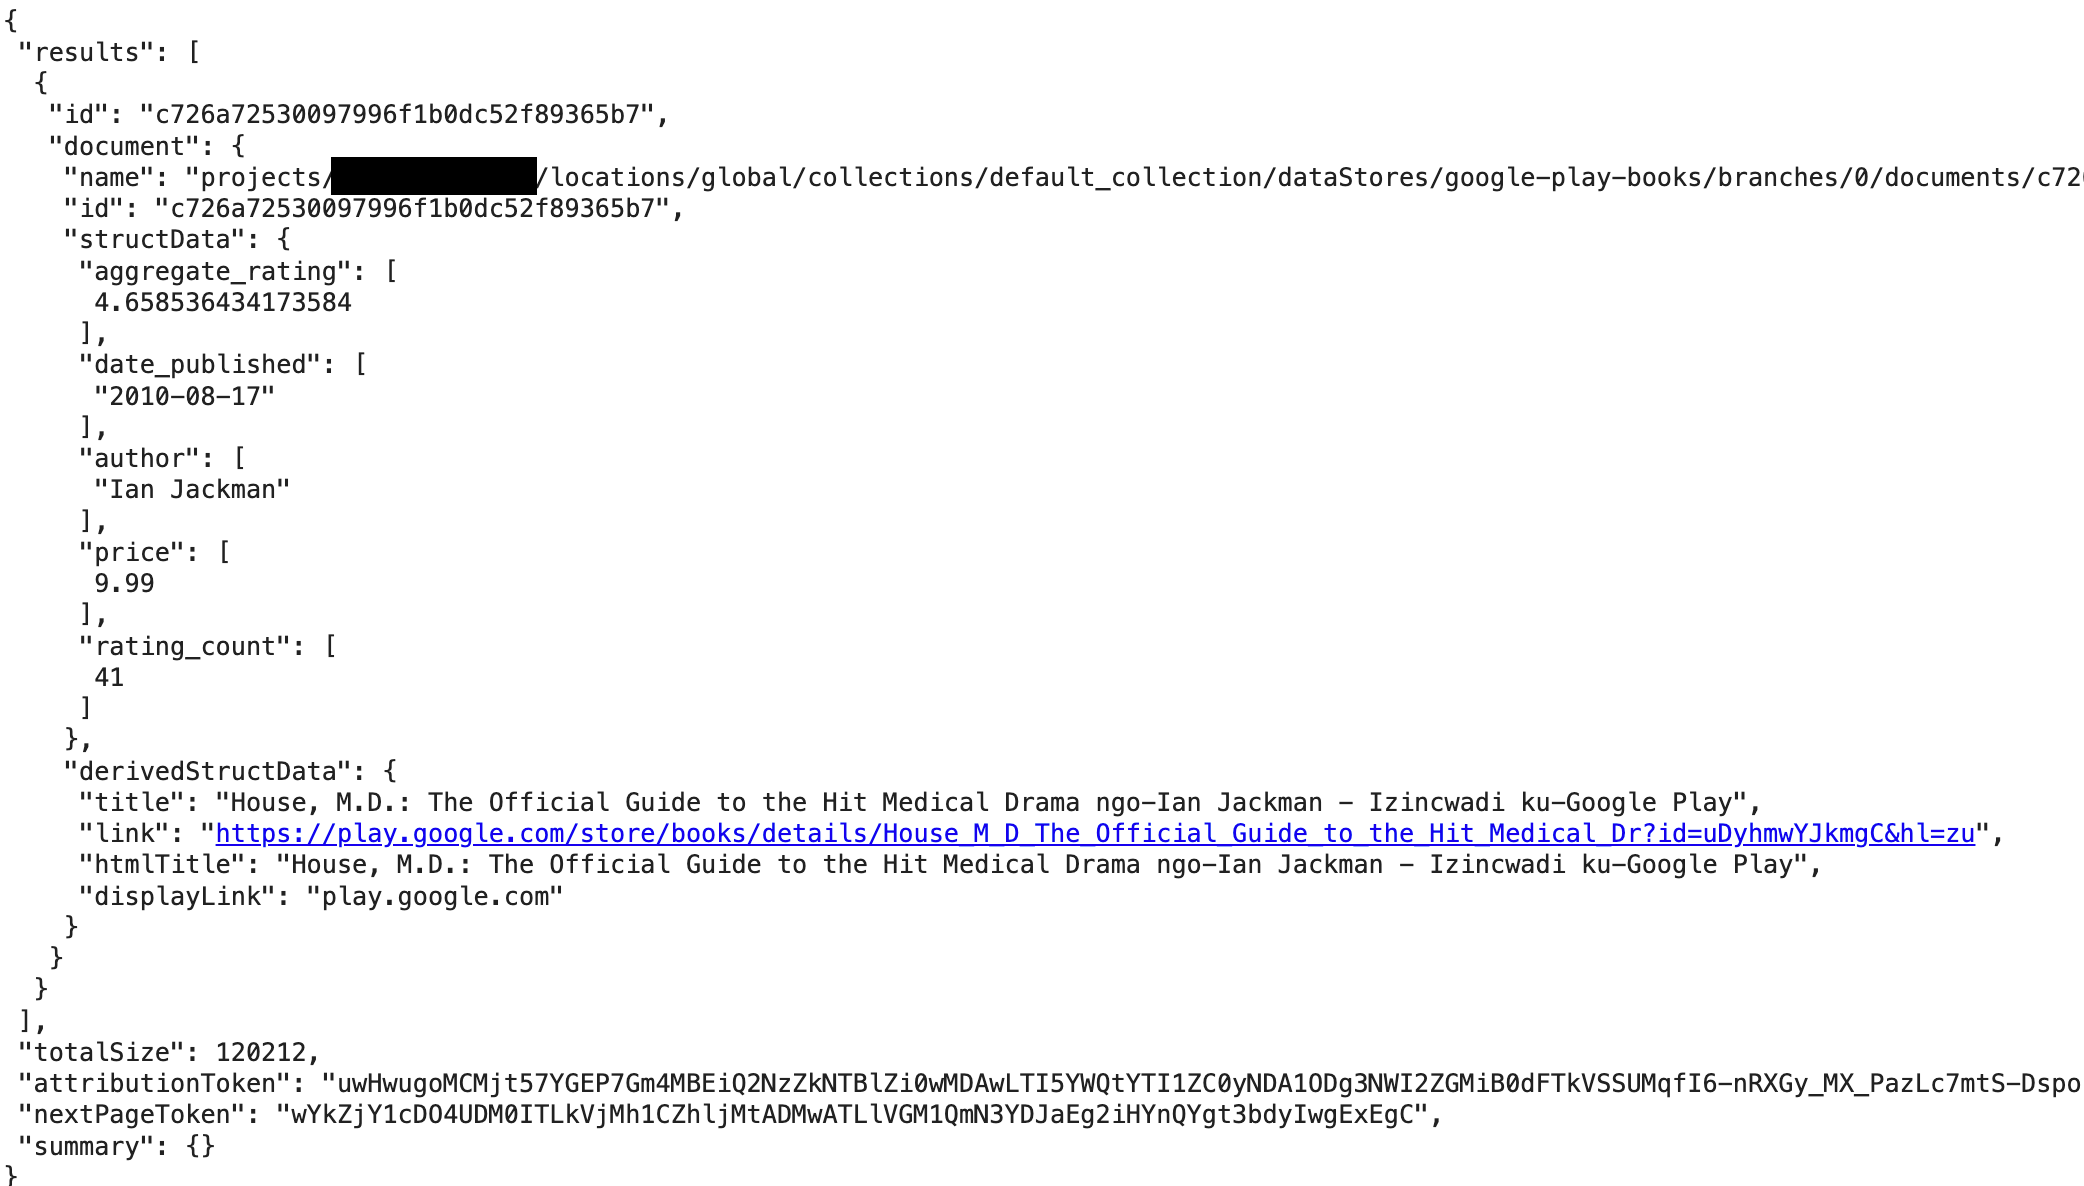


In [ ]:
QUERY = '' # @param {type: 'string'}
PAGE_SIZE = None # @param {type: 'integer'}

search_response = authed_session.post(
  f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/dataStores/{DATASTORE_ID}/servingConfigs/default_search:search',
  headers={
    'Content-Type': 'application/json'
  },
  json={
"query": QUERY,
"pageSize": PAGE_SIZE},
)

print(json.dumps(search_response.json(), indent=1))


## Search with Filter on a predefined field
Now let's apply a simple filter based on URL pattern. This is typically useful when your domain of interest has an interesting categorization of subdomains. Since the Google App Store used for our example doesn't have subdomains, we specify a certain pattern to only retrieve books with "the roots" in their title. The corresponding pattern will look like: "play.google.com/store/books/details/\*_The_roots_\*". We search for a generic Query "Books" but only get results with "_The_root_" in their URLs.

See more examples of filtering based on URLs [here](https://cloud.google.com/generative-ai-app-builder/docs/filter-website-search#examples-advanced-indexing)

You can also access [Google-inferred page date](https://cloud.google.com/generative-ai-app-builder/docs/boost-search-results#predefined-date-example) (i.e. datePublished and dateModified) which you can similarly use for filtering and boosting without a need for an Schema update.

Note that you ger a different (and a more comprehensive) set of predefined fields for [basic website search](https://cloud.google.com/generative-ai-app-builder/docs/filter-website-search#filter-expressions-basic-indexing).

In [ ]:
QUERY = '' # @param {type: 'string'}
PAGE_SIZE = None # @param {type: 'integer'}

search_response = authed_session.post(
  f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/dataStores/{DATASTORE_ID}/servingConfigs/default_search:search',
  headers={
    'Content-Type': 'application/json'
  },
  json={
"query": QUERY,
# Update this filter based on the structure of your domain/subdomains
"filter": "siteSearch:\"https://play.google.com/store/books/details/*_The_roots_*\"",
"pageSize": PAGE_SIZE},
)

print(json.dumps(search_response.json(), indent=1))

## Search with Filter on a user-defined metadata
Next, let's apply sample filters based on user-defined metadata.

In this example we limit our search to highly-rated free books. Let's also set a threshold for the number of ratings to make sure "high rating" is meaningful and reliable.  (i.e. price < 10 AND aggregate_rating > 4.5 AND rating_count > 10).

You can find more details on [Filter expression syntax](https://cloud.google.com/generative-ai-app-builder/docs/filter-search-metadata#filter-expression-syntax)

In [ ]:
QUERY = '' # @param {type: 'string'}
PAGE_SIZE = None # @param {type: 'integer'}

search_response = authed_session.post(
  f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/dataStores/{DATASTORE_ID}/servingConfigs/default_search:search',
  headers={
    'Content-Type': 'application/json'
  },
  json={
"query": QUERY,
# Update this filter definition based on your usecase and metadata
"filter": "rating_count>10 AND aggregate_rating>4.5 AND price=0",
"pageSize": PAGE_SIZE},
)

print(json.dumps(search_response.json(), indent=1))

# Step 4. Get Facets from Document Metadata

Facets are used to enhance user experience by providing UI elements that allow users to narrow down their search universe. They are most commonly found on retail website where you can choose your brand, size, color, etc after making an initial search (or even without putting in any queries as you "Browse" the landing page).

Typically upon selection of a particular facet by the end user, you will issue a subsequent search with a corresponding filter added to update the results accordingly. Each facet response contains the syntax of its corresponding filter as well.

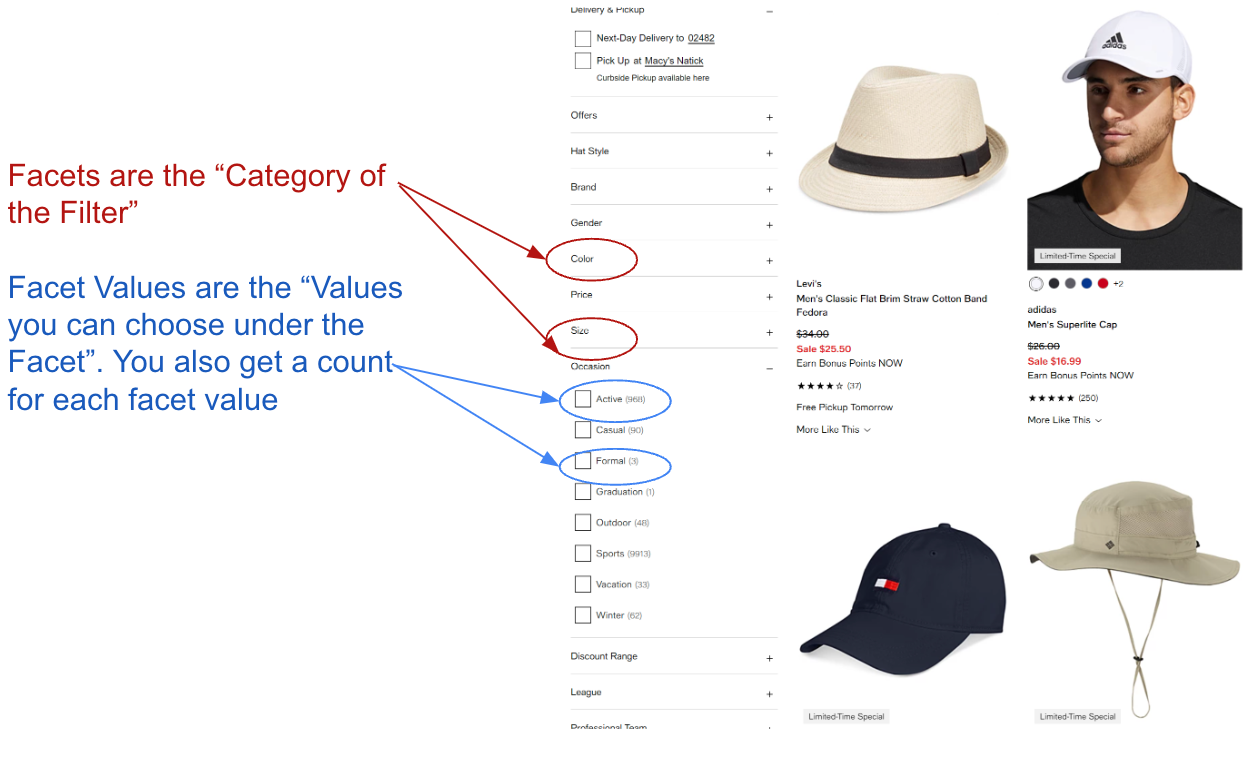

## Fixed and Dynamic facets

In order to get Facets in the response, you need to specify `facetSpecs` in the request. You can find more details in the [documentation](https://cloud.google.com/generative-ai-app-builder/docs/reference/rest/v1/FacetSpec).

Each facet within the list of `facetSpecs` can have a fixed, or a dynamic positioning.

In the response, facets with fixed positioning (i.e. enableDynamicPosition = False) will always show up at top with the same ordering as in the request. The Dynamics facets are ordered lower, with their relative ordering decided based on the query and likelihood of users being interested in them.

For the fields to be eligible for Dynamic faceting, they should be specified as both indexable and dynamicFacetable in the [Schema](https://cloud.google.com/generative-ai-app-builder/docs/provide-schema). You also need to send [user events](https://cloud.google.com/generative-ai-app-builder/docs/user-events?hl=en) to make effective use of the facets.  

Below is a screenshot of the facet part of the response for a sample query used here:

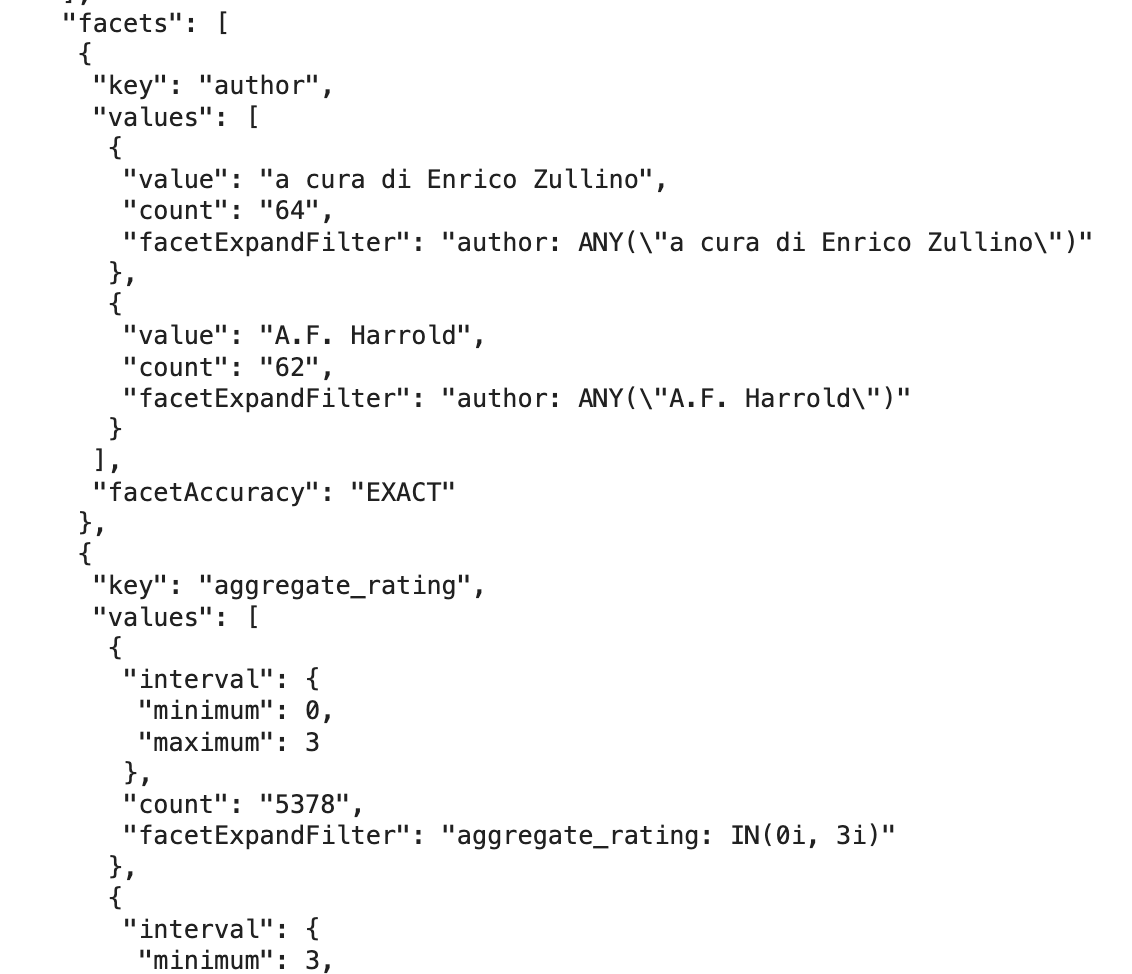



In [ ]:
QUERY = ''  # @param {type: 'string'}
PAGE_SIZE = None  # @param {type: 'integer'}

search_response = authed_session.post(
    f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/dataStores/{DATASTORE_ID}/servingConfigs/default_search:search',
    headers={
        'Content-Type': 'application/json'
    },
    json={
        "query": QUERY,
        # Update this facet definition based on your usecase and metadata
        "facetSpecs": [
            {
                "facetKey": {
                    "key": "author"
                },
                "limit": 2,
                "enableDynamicPosition": False
            },
            {
                "facetKey": {
                    "key": "aggregate_rating",
                    "intervals": [
                        {
                            "minimum": 0,
                            "maximum": 3
                        },
                        {
                            "minimum": 3,
                            "maximum": 4.5
                        },
                        {
                            "minimum": 4.5,
                            "maximum": 5
                        }
                    ],
                },
                "limit": 3,
                "enableDynamicPosition": True
            },
            {
                "facetKey": {
                    "key": "rating_count",
                    "intervals": [
                        {
                            "minimum": 0,
                            "maximum": 10
                        },
                        {
                            "minimum": 10,
                            "maximum": 100
                        },
                        {
                            "minimum": 100
                        }
                    ],
                },
                "limit": 3,
                "enableDynamicPosition": True
            },
        ],
        "pageSize": PAGE_SIZE
    },
)

print(json.dumps(search_response.json(), indent=1))

# Step 5. Influence the Ranking via Boosting

## Basic Boosting
As a basic demonstration of Boosting, let's look at a constant boost value on all documents meeting a certain criteria. A basic Boost has a condition (with the same syntax as [filters](https://cloud.google.com/generative-ai-app-builder/docs/filter-search-metadata#filter-expression-syntax)) and a Boost value.

Boost value should be a number between -1.0 and +1.0 where negative numbers demote the matched documents (a.k.a. Bury). The boost function behaves roughly exponentially.

It is generally advised to start with smaller boost values and adjust it as needed. If a document gets hit by several Boost conditions the boost amounts are additive.

In this example we boost all the books written by "Margaret Atwood". The boost value in this example is set to 0.9. With this boost we get books by "Margaret Atwood" for a generic query like "Book", but if you search for a particular title not written by Margaret Atwood (e.g. "house of cards") you'd still get that title as the top result. to put it in physics terms, you can think of Boosting as a forcing function whereas Filters are constraints.




In [ ]:
QUERY = '' # @param {type: 'string'}
PAGE_SIZE = None # @param {type: 'integer'}

search_response = authed_session.post(
  f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/dataStores/{DATASTORE_ID}/servingConfigs/default_search:search',
  headers={
    'Content-Type': 'application/json'
  },
  json={
"boostSpec": {
  "conditionBoostSpecs": {
    "condition": "author: ANY(\"Margaret Atwood\")",
    "boost": 0.9
  }
},
"query": QUERY,
"pageSize": PAGE_SIZE},
)

print(json.dumps(search_response.json(), indent=1))


## Advanced Boosting
Now let's look at a more sophisticated example of a boost rule. As mentioned earlier in this notebook,it is generally advised to try VAIS results out of the box and/or leverage user events to fine tune the rankings based on user behavior. However, in some cases, customers are interested to apply a certain business logic to the results which makes custom rules inevitable.

For this particular example we want to primarily leverage user provided ratings to influence search results, specifically rating count and rating average. We also leverage VAIS's ability to apply [piecewise linear boost functions](https://cloud.google.com/generative-ai-app-builder/docs/boost-search-results#custom-numerical-attr-boost) as opposed to fixed boost amounts. We apply different Boost values as the function of the average rating for different buckets of rating counts (see more details in comments of the code block below). We also apply a separate boost rule to boost books with a larger number of ratings irrespective of the average rating (i.e. generally popular books). To make sure that rule does not demote newer content unfairly, we supplement the boost rules by a freshness boost. Lastly to ensure we're not suggesting popular and highly rated, yet irrelevant books to all queries, we're adding a [relevancy threshold filter](https://cloud.google.com/generative-ai-app-builder/docs/filter-by-relevance).

Note that the value and logic used here are for demonstration purposes. Please adjust them based on your business logic and metadata schema.

You can find more examples of Boosting in [public documentation](https://cloud.google.com/generative-ai-app-builder/docs/boost-search-results)




In [ ]:
QUERY = '' # @param {type: 'string'}
PAGE_SIZE = None # @param {type: 'integer'}

search_response = authed_session.post(
  f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/dataStores/{DATASTORE_ID}/servingConfigs/default_search:search',
  headers={
    'Content-Type': 'application/json'
  },
  json={
"boostSpec": {
    "conditionBoostSpecs": [   # The absolute level of boost values can be offset to adjust the balance between recipes and other template types
        {
            "condition": "rating_count>=10",  #only apply to books with more than 10 ratings
            "boostControlSpec": {
                "attributeType": "NUMERICAL",
                "interpolationType": "LINEAR",
                "fieldName": "aggregate_rating",
                "controlPoints": [
                    {"attributeValue": "0.0", "boostAmount": -0.8}, #kill results with high rating count and low rating. They've had their chance!
                    {"attributeValue": "3.0", "boostAmount": -0.6},  # be aggressive for anything less than 3 stars
                    {"attributeValue": "4.5", "boostAmount": 0.0}, # People are typically generous. Let's assume 4.5 means ok
                    {"attributeValue": "5.0", "boostAmount": 0.3}, # go more aggressivly up as we get closer to 5. more than 35 votes very close to 5 means awesome.
                ],
            },
        },
        {
            "condition": "rating_count<10", # Now let's consider books with fewer ratings
            "boostControlSpec": {
                "attributeType": "NUMERICAL",
                "interpolationType": "LINEAR",
                "fieldName": "aggregate_rating",
                "controlPoints": [
                    {"attributeValue": "0.0", "boostAmount": -1.0}, # I really don't want to see low rating AND low rating count
                    {"attributeValue": "4.5", "boostAmount": 0}, # with average rating of 4.5, let's give it a chance
                    {"attributeValue": "5.0", "boostAmount": 0.1}, # a small boost, but with fewer reviews, high rating may not mean much.
                ],
            },
        },
        {
            "condition": "rating_count>=0", # no particular meaning, it's just to make the condition True
            "boostControlSpec": {
                "attributeType": "NUMERICAL",
                "interpolationType": "LINEAR",
                "fieldName": "rating_count",
                "controlPoints": [
                    {"attributeValue": "0", "boostAmount": -0.3}, # burry low rating count
                    {"attributeValue": "20", "boostAmount": 0.05}, # a steep boost curve from 0 to 20
                    {"attributeValue": "300", "boostAmount": 0.2}, # more gentle boost from 20 to 300
                    {"attributeValue": "1000", "boostAmount": 0.35}, # even mor gentle as we get passed 300, and saturate at 1000
                ],
            },
        },
        {
            "condition": "rating_count>=0", # no particular meaning, it's just to make the condition True
            "boostControlSpec": {
                "attributeType": "FRESHNESS",
                "interpolationType": "LINEAR",
                "fieldName": "date_published",
                "controlPoints": [
                    {"attributeValue": "0d", "boostAmount": 0.2},
                    {"attributeValue": "30d", "boostAmount": 0.15},
                    {"attributeValue": "60d", "boostAmount": 0.1},
                    {"attributeValue": "180d", "boostAmount": 0.0},
                ],
            },
        },
    ]
},
"query": QUERY,
"relevanceThreshold": "MEDIUM",
"pageSize": PAGE_SIZE},
)

print(json.dumps(search_response.json(), indent=1))


# Clean up

## Delete the Search App

Delete the App if you no longer need it

Alternatively you can follow [these instructions](https://console.cloud.google.com/gen-app-builder/data-stores) to delete an App from the UI


In [ ]:
response = authed_session.delete(
f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/engines/{APP_ID}',
  headers={
     "X-Goog-User-Project": PROJECT_ID
  }
    )

print(response.text)

##Delete the Datastores
Delete the Datastore if you no longer need it

Alternatively you can follow [these instructions](https://console.cloud.google.com/gen-app-builder/data-stores) to delete a Datastore from the UI

In [ ]:
response = authed_session.delete(
f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/dataStores/{DATASTORE_ID}',
  headers={
     "X-Goog-User-Project": PROJECT_ID
  }
    )

print(response.text)